In [2]:
import sys
sys.path.append('D:\\pythonAnaconda\\Anaconda\\envs\\ox\\python37.zip')
sys.path.append('D:\\pythonAnaconda\\Anaconda\\envs\\ox\\DLLs')
sys.path.append('D:\\pythonAnaconda\\Anaconda\\envs\\ox\\lib')
sys.path.append('D:\\pythonAnaconda\\Anaconda\\envs\\ox')
sys.path.append('D:\\pythonAnaconda\\Anaconda\\envs\\ox\\lib\\site-packages')
sys.path.append('D:\\pythonAnaconda\\Anaconda\\envs\\ox\\lib\\site-packages\\win32')
sys.path.append('D:\\pythonAnaconda\\Anaconda\\envs\\ox\\lib\\site-packages\\win32\\lib')
sys.path.append('D:\\pythonAnaconda\\Anaconda\\envs\\ox\\lib\\site-packages\\Pythonwin')

In [2]:
import dill
import jupyter_contrib_nbextensions

ModuleNotFoundError: No module named 'dill'

In [4]:
#import all utilities imports
import matplotlib as mp, pandas as pd, numpy as np, geopandas as gpd
import functools
import math
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pysal as ps
import random
import pylab
import matplotlib.colors as cols
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import Point, LineString, MultiLineString
from numpy.random import randn
from scipy import sparse
from scipy.sparse import linalg
import matplotlib.patches as mpatches
import sys
from time import sleep
pd.set_option('precision', 10)
from mpl_toolkits.mplot3d.art3d import Line3DCollection

OSError: Could not find lib geos_c.dll or load any of its variants ['D:\\pythonAnaconda\\Anaconda\\Library\\lib\\geos_c.dll'].

In [3]:
#import all street network fuctions imports
import osmnx as ox, networkx as nx, matplotlib.cm as cm, pandas as pd, numpy as np, geopandas as gpd
import functools
import community
import math
from math import sqrt
import matplotlib.pyplot as plt
import ast

from scipy import sparse
from scipy.sparse import linalg
import pysal as ps

from shapely.geometry import Point, LineString, Polygon, MultiPolygon, mapping, MultiLineString
from shapely.ops import cascaded_union, linemerge, nearest_points
pd.set_option('precision', 10)

In [4]:
#import computational notebook functions
import networkx as nx, matplotlib.cm as cm, pandas as pd, numpy as np
import community
import matplotlib.pyplot as plt
from importlib import reload
import geopandas as gpd
import functools
%matplotlib inline

pd.set_option('precision', 5)
pd.options.display.float_format = '{:20.2f}'.format
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None

import street_network_functions as snf
import utilities as uf

## 1. Download and simplify graph 

In [5]:
#initialise path, names, etc.

city_name = 'Valencia'
saving_path ='dataComp/'+city_name+'/VlnWGS84/'
epsg = 4326
crs = {'init': 'epsg:4326', 'no_defs': True}

In [6]:
# choose the method and specify how the graph is obtained

option_1 = True
option_2 = False

download = True
shapeFiles = False

In [7]:
#in case of Valencia, specify location and downloading method
placeValencia = 'Puerta del Mar, Valencia, ES'
method_A = 'distance_from_address'

if (download == True):
    
    if (option_1 == True):
        #graph_A  
        nodes_small, edges_small = snf.get_fromOSM(method_A, placeValencia, 'bike', epsg, distance = 4000)
        print("done - Option 1")

done - Option 1


In [8]:
#simplifying network (for small ones)
nodes_small, edges_small = snf.reset_index_gdf(nodes_small, edges_small)
nodes_small, edges_small = snf.clean_network(nodes_small, edges_small, dead_ends = True)

possible double edges 136
possible double edges 88
possible double edges 29
possible double edges 9
possible double edges 3
possible double edges 2
possible double edges 2
possible double edges 1
possible double edges 1
possible double edges 1
possible double edges 1
possible double edges 1
possible double edges 1
possible double edges 0
Correcting edges coordinates..
Done
Done after  14  cycles


## 1.2 Primal Graph  

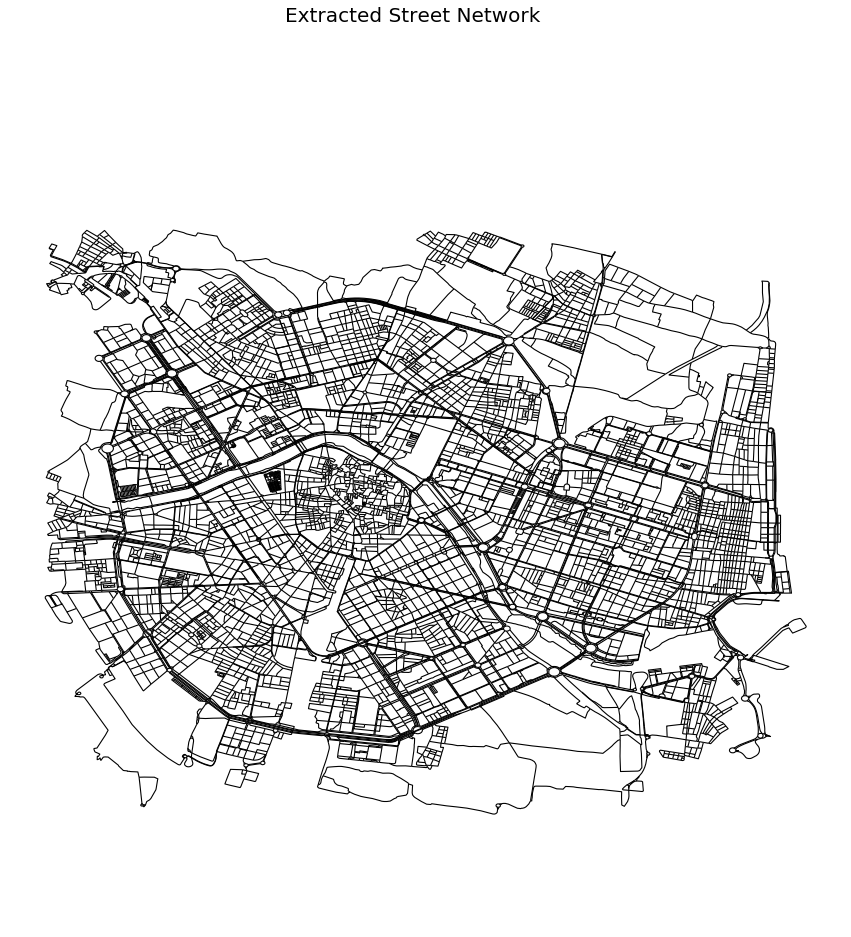

In [9]:
uf.plot_lines(edges_small, bb = False, f = 15, title = 'Extracted Street Network')

### Explore Data 

In [19]:
edges_small

,streetID,key,geometry,length,highway,oneway,name,u,v,pedestrian
6,6,0,"LINESTRING (-0.35455 39.47602, -0.35442 39.47629)",0.000,cycleway,0,NaN,2,5370,0
7,7,0,"LINESTRING (-0.35455 39.47602, -0.35462 39.47588)",0.000,cycleway,0,NaN,2,6,0
8,8,0,"LINESTRING (-0.35455 39.47602, -0.35497 39.476...",0.001,primary,1,Avinguda de Blasco Ibáñez,2,6476,0
9,9,0,"LINESTRING (-0.39384 39.45899, -0.39386 39.459...",0.000,pedestrian,0,Carrer d'En Galceràn,3,3489,1
10,10,0,"LINESTRING (-0.39384 39.45899, -0.39353 39.458...",0.000,pedestrian,0,NaN,3,4499,1
...,...,...,...,...,...,...,...,...,...,...
31438,31438,0,"LINESTRING (-0.40383 39.45488, -0.40366 39.454...",0.001,residential,1,Carrer del Professor Àngel Lacalle,14158,13027,0
31439,31439,0,"LINESTRING (-0.40383 39.45488, -0.40376 39.454...",0.001,residential,1,Carrer de l'Arquitecte Segura de Lago,14158,693,0
31443,31443,0,"LINESTRING (-0.39293 39.46073, -0.39206 39.46163)",0.001,residential,1,Carrer de Maria Jordán,14160,637,0
31444,31444,0,"LINESTRING (-0.39293 39.46073, -0.39251 39.46049)",0.000,residential,1,Carrer de Manuel Simó,14160,4341,0


In [20]:
nodes_small

,nodeID,x,y,geometry
2,2,-0.355,39.476,POINT (-0.35455 39.47602)
3,3,-0.394,39.459,POINT (-0.39384 39.45899)
4,4,-0.343,39.481,POINT (-0.34340 39.48101)
6,6,-0.355,39.476,POINT (-0.35462 39.47588)
8,8,-0.373,39.463,POINT (-0.37266 39.46254)
...,...,...,...,...
14158,14158,-0.404,39.455,POINT (-0.40383 39.45488)
14159,14159,-0.391,39.455,POINT (-0.39103 39.45544)
14160,14160,-0.393,39.461,POINT (-0.39293 39.46073)
14163,14163,-0.392,39.462,POINT (-0.39199 39.46170)


In [14]:
# obtaining graph from the two geodataframes
if 'key' in edges_small.columns: edges_small = edges_small[edges_small.key == 0]
G_raw = snf.graph_fromGDF(nodes_small, edges_small, 'nodeID')

In [26]:
# add definition to the graph
G_raw.graph['name'] = city_name
G_raw.graph['crs'] = crs

In [25]:
G_raw.graph

{'name': 'Valencia', 'crs': {'init': 'epsg:4326', 'no_defs': True}}

## 1.3 adding elevation

In [27]:
#call api from google elevation
api_key = "googleAPI"

In [36]:
# add node elevation from API
G_Nelv = ox.add_node_elevations(G_raw, api_key)

In [35]:
#?? want to display node value after adding elevation
# G_Nelv.nodes[0]

In [37]:
G_EGrade = ox.add_edge_grades(G_Nelv)

TypeError: __call__() got an unexpected keyword argument 'keys'

In [44]:
nodes_elv = ox.graph_to_gdfs(G_Nelv, nodes=True, edges=False, node_geometry=True, fill_edge_geometry=False)

In [43]:
edgesWGS = ox.graph_to_gdfs(G_Nelv, nodes=False, edges=True, node_geometry=True, fill_edge_geometry=False)

TypeError: __call__() got an unexpected keyword argument 'keys'

In [45]:
nodes_elv.crs = crs
nodes_elv.to_file(saving_path+'nodes_elv.shp', driver = 'ESRI Shapefile')

In [47]:
ox.gdfs_to_graph??

## test 2: use nodesWGS to create graph with osmnx 

In [48]:
G_raw2 = ox.gdfs_to_graph(nodes_elv, edges_small)

In [49]:
G_EGrade2 = ox.add_edge_grades(G_raw2)

In [54]:
edges_elv = ox.graph_to_gdfs(G_EGrade2, nodes=False, edges=True, node_geometry=True, fill_edge_geometry=False)

In [55]:
edges_elv

,u,v,key,streetID,geometry,length,highway,oneway,pedestrian,grade,grade_abs,name
0,2,5370,0,6,"LINESTRING (-0.35455 39.47602, -0.35442 39.47629)",0.000,cycleway,0,0,1665.190,1665.190,NaN
1,2,6,0,7,"LINESTRING (-0.35455 39.47602, -0.35462 39.47588)",0.000,cycleway,0,0,-1362.662,1362.662,NaN
2,2,6476,0,8,"LINESTRING (-0.35455 39.47602, -0.35497 39.476...",0.001,primary,1,0,2231.381,2231.381,Avinguda de Blasco Ibáñez
3,3,3489,0,9,"LINESTRING (-0.39384 39.45899, -0.39386 39.459...",0.000,pedestrian,0,1,1271.912,1271.912,Carrer d'En Galceràn
4,3,4499,0,10,"LINESTRING (-0.39384 39.45899, -0.39353 39.458...",0.000,pedestrian,0,1,710.341,710.341,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19091,14158,13027,0,31438,"LINESTRING (-0.40383 39.45488, -0.40366 39.454...",0.001,residential,1,0,443.632,443.632,Carrer del Professor Àngel Lacalle
19092,14158,693,0,31439,"LINESTRING (-0.40383 39.45488, -0.40376 39.454...",0.001,residential,1,0,100.304,100.304,Carrer de l'Arquitecte Segura de Lago
19093,14160,637,0,31443,"LINESTRING (-0.39293 39.46073, -0.39206 39.46163)",0.001,residential,1,0,46.323,46.323,Carrer de Maria Jordán
19094,14160,4341,0,31444,"LINESTRING (-0.39293 39.46073, -0.39251 39.46049)",0.000,residential,1,0,-1133.567,1133.567,Carrer de Manuel Simó


## 1.4 Save graphs as gdf as shapefile 

In [53]:
#basically even if i can create pretty graph with snf, it is only a graph, but no directions, therefore cant read u&v
#now using ox graph, it works perfectly

In [56]:
edges_elv.crs = crs
edges_elv.to_file(saving_path+'edges_elv.shp', driver = 'ESRI Shapefile')

## 1.5 display elevation and grades

In [57]:
edge_grades = [data['grade_abs'] for u, v, k, data in ox.get_undirected(G_EGrade2).edges(keys=True, data=True)]

In [59]:
avg_grade = np.mean(edge_grades)
print('Average street grade in {} is {:.1f}%'.format(city_name, avg_grade*100))

med_grade = np.median(edge_grades)
print('Median street grade in {} is {:.1f}%'.format(city_name, med_grade*100))

Average street grade in Valencia is 110450.4%
Median street grade in Valencia is 70814.6%


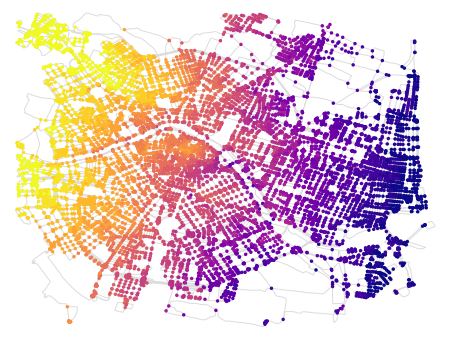

In [61]:
# get one color for each node, by elevation, then plot the network
nc = ox.get_node_colors_by_attr(G_EGrade2, 'elevation', cmap='plasma', num_bins=20)
fig, ax = ox.plot_graph(G_EGrade2, fig_height=6, node_color=nc, node_size=12, node_zorder=2, edge_color='#dddddd')

## Redo with new length 

In [63]:
G_edgeL = ox.add_edge_lengths(G_EGrade2)

In [64]:
G_EGrade3 = ox.add_edge_grades(G_edgeL)

In [65]:
edges_elv3 = ox.graph_to_gdfs(G_EGrade3, nodes=False, edges=True, node_geometry=True, fill_edge_geometry=False)
edges_elv3

,u,v,key,streetID,geometry,length,highway,oneway,pedestrian,grade,grade_abs,name
0,2,5370,0,6,"LINESTRING (-0.35455 39.47602, -0.35442 39.47629)",32.128,cycleway,0,0,0.016,0.016,NaN
1,2,6,0,7,"LINESTRING (-0.35455 39.47602, -0.35462 39.47588)",16.423,cycleway,0,0,-0.013,0.013,NaN
2,2,6476,0,8,"LINESTRING (-0.35455 39.47602, -0.35497 39.476...",65.709,primary,1,0,0.025,0.025,Avinguda de Blasco Ibáñez
3,3,3489,0,9,"LINESTRING (-0.39384 39.45899, -0.39386 39.459...",47.111,pedestrian,0,1,0.013,0.013,Carrer d'En Galceràn
4,3,4499,0,10,"LINESTRING (-0.39384 39.45899, -0.39353 39.458...",42.766,pedestrian,0,1,0.008,0.008,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19091,14158,13027,0,31438,"LINESTRING (-0.40383 39.45488, -0.40366 39.454...",113.842,residential,1,0,0.005,0.005,Carrer del Professor Àngel Lacalle
19092,14158,693,0,31439,"LINESTRING (-0.40383 39.45488, -0.40376 39.454...",98.874,residential,1,0,0.001,0.001,Carrer de l'Arquitecte Segura de Lago
19093,14160,637,0,31443,"LINESTRING (-0.39293 39.46073, -0.39206 39.46163)",124.854,residential,1,0,0.001,0.001,Carrer de Maria Jordán
19094,14160,4341,0,31444,"LINESTRING (-0.39293 39.46073, -0.39251 39.46049)",44.783,residential,1,0,-0.012,0.012,Carrer de Manuel Simó


In [68]:
avg_grade = np.mean(edges_elv3.grade_abs)
print('Average street grade in {} is {:.1f}%'.format(city_name, avg_grade*100))

med_grade = np.median(edges_elv3.grade_abs)
print('Median street grade in {} is {:.1f}%'.format(city_name, med_grade*100))

Average street grade in Valencia is 1.2%
Median street grade in Valencia is 0.8%


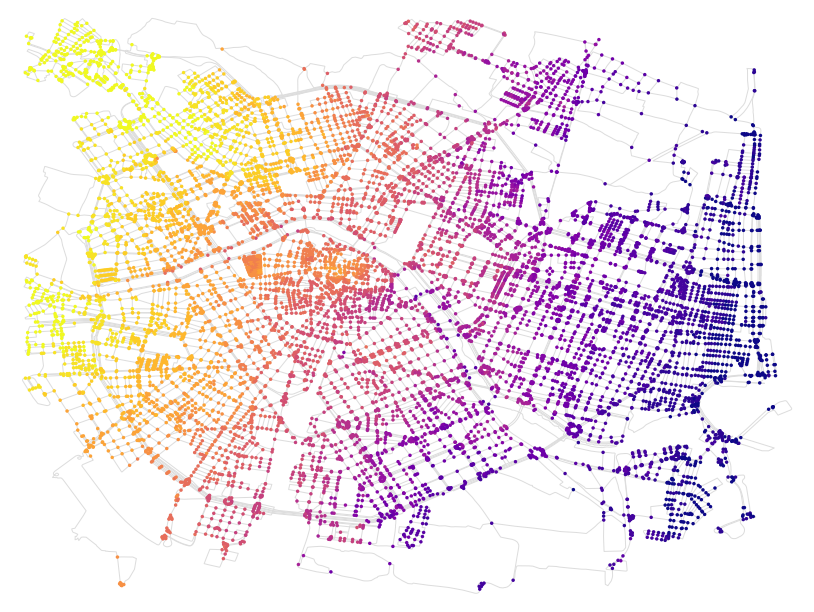

In [70]:
# get one color for each node, by elevation, then plot the network
nc = ox.get_node_colors_by_attr(G_EGrade2, 'elevation', cmap='plasma', num_bins=20)
fig, ax = ox.plot_graph(G_EGrade2, fig_height=11, node_color=nc, node_size=12, node_zorder=2, edge_color='#dddddd')

In [71]:
nodes_elv.crs = crs
nodes_elv.to_file(saving_path+'nodes_elv.shp', driver = 'ESRI Shapefile')
edges_elv3.crs = crs
edges_elv3.to_file(saving_path+'edges_elv.shp', driver = 'ESRI Shapefile')

## 2 Create dual Graph 

In [74]:
nodesDual, edgesDual = snf.dual_gdf(nodes_elv, edges_elv3, crs)

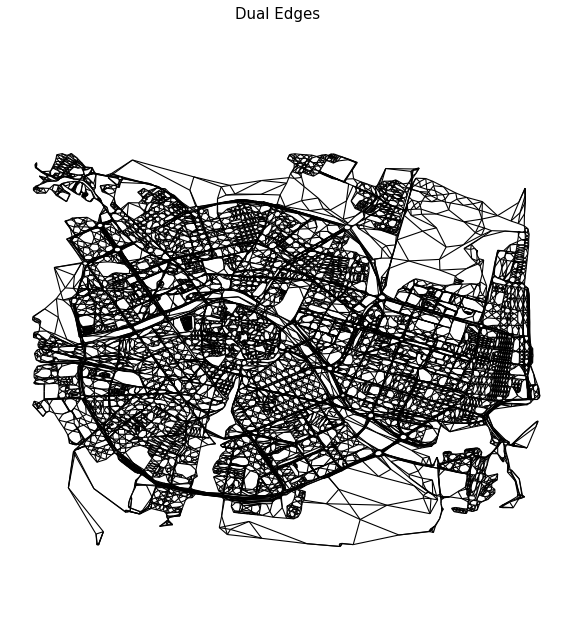

In [76]:
uf.plot_lines(edgesDual, bb = False, f = 10, title = 'Dual Edges')

In [78]:
nodesDual

,streetID,intersecting,length,geometry,x,y
streetID,,,,,,
6,6,"[7, 8, 103, 120, 11844, 11855]",32.128,POINT (-0.35449 39.47615),-0.354,39.476
7,7,"[8, 19, 20, 120, 9579]",16.423,POINT (-0.35459 39.47595),-0.355,39.476
8,8,"[120, 9580, 14221]",65.709,POINT (-0.35490 39.47613),-0.355,39.476
9,9,"[10, 11, 7658, 7670]",47.111,POINT (-0.39401 39.45915),-0.394,39.459
10,10,"[11, 9946, 17073]",42.766,POINT (-0.39361 39.45891),-0.394,39.459
...,...,...,...,...,...,...
31438,31438,[31439],113.842,POINT (-0.40323 39.45509),-0.403,39.455
31439,31439,[],98.874,POINT (-0.40357 39.45448),-0.404,39.454
31443,31443,[31444],124.854,POINT (-0.39249 39.46118),-0.392,39.461


In [79]:
nodesDualX = nodesDual.drop('intersecting', axis=1)

In [80]:
nodesDualX.crs = crs
nodesDualX.to_file(saving_path+'nodesDual_E.shp', driver = 'ESRI Shapefile')
edgesDual.crs = crs
edgesDual.to_file(saving_path+'edgesDual_E.shp', driver = 'ESRI Shapefile')

In [81]:
dill.dump_session('valencia_G.db')

In [82]:
#to do tomorrow - map things into weights && try to run the algorithm 

## 3. Time to route
### 3.1 Shortest path on primal graph

In [5]:
dill.load_session('valencia_G.db')

In [1]:
#G_EGrade3 graph name for primal graph

In [6]:
#Oceanogràfic of Valencia : 39.45305, -0.3471
#Porta de la Mar: 39.4721, -0.3685
originPt = (39.45305, -0.3471)
desPt = (39.4721, -0.3685)
originN = ox.get_nearest_node(G_EGrade3, originPt)
desN = ox.get_nearest_node(G_EGrade3, desPt)
originN, desN

(7960, 5101)

In [8]:
# find the shortest path between origin and destination nodes
route1 = nx.shortest_path(G_EGrade3, originN, desN, weight='length')
str(route1)

'[7960, 13611, 3954, 1872, 481, 13571, 13572, 2593, 13573, 1998, 11441, 11484, 11490, 11491, 6831, 6833, 4685, 921, 6837, 836, 9092, 9087, 6047, 7385, 8324, 8418, 10005, 10903, 3861, 11299, 11295, 11296, 31, 5146, 9801, 9802, 11815, 5391, 5394, 5401, 5101]'

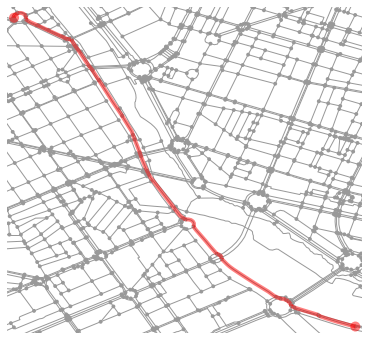

In [87]:
# plot the route showing origin/destination lat-long points in blue
fig2, ax2 = ox.plot_graph_route(G_EGrade3, route1, bbox=bbox, fig_height = 6,orig_dest_point_color='b')

In [83]:
def create_bbox(G, route):
   routelines = ox.node_list_to_coordinate_lines(G, route)
   shplyRL = MultiLineString(routelines)
   shplyBbox = shplyRL.bounds
   bbox = [shplyBbox[3],shplyBbox[1],shplyBbox[2],shplyBbox[0]]
    
   return bbox

In [154]:
routelines = ox.node_list_to_coordinate_lines(G_EGrade3, route1)
routelines[0]

[(-0.3472757, 39.4520666),
 (-0.347478, 39.4521119),
 (-0.3478194, 39.4522085),
 (-0.3484334, 39.4523821),
 (-0.3491089, 39.4525944),
 (-0.3495496, 39.4527452)]

In [85]:
bbox = create_bbox(G_EGrade3, route1)
bbox

[39.4723912, 39.4520666, -0.3472757, -0.3688245]

### 4. Least angular path dual graph 

 - part 1: 3 ways to create a dual graph (1: original snf, 2: MultiDi Snf, 3: ox gdf to graph) 
 - part 2: trying to route with dual graph  

### 4.1.1 Try Dual Graph 1: using SNF only 

In [118]:
DG_elv_snf = snf.get_dual_graph(nodesDual, edgesDual)

In [119]:
DG_elv_snf.graph['crs'] = crs
DG_elv_snf.graph['crs']


{'init': 'epsg:4326', 'no_defs': True}

In [120]:
DG_elv_snf.graph['name'] = city_name
DG_elv_snf.graph['name']

'Valencia'

In [122]:
ox.plot_graph(DG_elv_snf)

TypeError: __call__() got an unexpected keyword argument 'keys'

conclusion: snf cannot be used cause its just a undirected graph, and ox requires MultiDirectedGraph to plot

### 4.1.2 Try Route 1 with SNF Dual Graph

In [125]:
#map OD at node
originND_snf = ox.get_nearest_node(DG_elv_snf, originPt)
desND_snf = ox.get_nearest_node(DG_elv_snf, desPt)
originND_snf,desND_snf

(17890, 11910)

In [126]:
# find the shortest path between origin and destination nodes
routeND_snf = nx.shortest_path(DG_elv_snf, originND_snf, desND_snf, weight='deg')
str(routeND_snf)

'[17890, 8707, 4124, 4122, 4140, 4128, 4129, 4406, 4413, 25459, 25569, 25578, 25579, 14959, 14961, 10369, 2033, 14968, 1818, 20295, 20283, 13313, 16393, 18657, 9474, 9480, 24288, 8490, 25173, 25165, 25167, 90, 19614, 25113, 25108, 25103, 25100, 25133, 11259, 11897, 11898, 11910]'

In [127]:
# plot the route showing origin/destination lat-long points in blue
figDG_snf, axDG_snf = ox.plot_graph_route(DG_elv_snf, routeND_snf, fig_height = 11,orig_dest_point_color='b')

TypeError: __call__() got an unexpected keyword argument 'keys'

*cannot plot graph again because its not multigraph

### 4.3.1 Try Dual Graph 3: using ox gdf to graph 

In [128]:
#using original nodesDual 
DG_elv_ox = ox.gdfs_to_graph(nodesDual, edgesDual)

AttributeError: 'GeoDataFrame' object has no attribute 'gdf_name'

nodesDual has no attribute called gdf_name, have to add gdf

In [135]:
nodesDual.gdf_name = city_name
nodesDual.gdf_name

'Valencia'

In [136]:
DG_elv_ox2 = ox.gdfs_to_graph(nodesDual, edgesDual)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

WTF is element ambigious??!!!!

In [137]:
#using nodesDual from the original graph
nodesDual2 = ox.graph_to_gdfs(DG_elv_snf, nodes=True, edges=False, node_geometry=True, fill_edge_geometry=False)

In [138]:
nodesDual2.gdf_name

'Valencia_nodes'

In [139]:
DG_elv_ox3 = ox.gdfs_to_graph(nodesDual2, edgesDual)

KeyError: 'key'

****need to add 'key'attribute at edges

In [113]:
dill.dump_session('valencia_G.db')

### 4.2.1 Try Dual Graph 2: using SNF2 only 

In [140]:
import street_network_functions2 as snf2

In [141]:
##changed the code from nondirected graph to multidirectional graph
DG_elv_snf2 = snf2.get_dual_graph(nodesDual, edgesDual)

In [8]:
DG_elv_snf2.graph['crs'] = crs
DG_elv_snf2.crs

AttributeError: 'MultiDiGraph' object has no attribute 'crs'

In [144]:
DG_elv_snf2.graph['name'] = city_name
DG_elv_snf2.name

'Valencia'

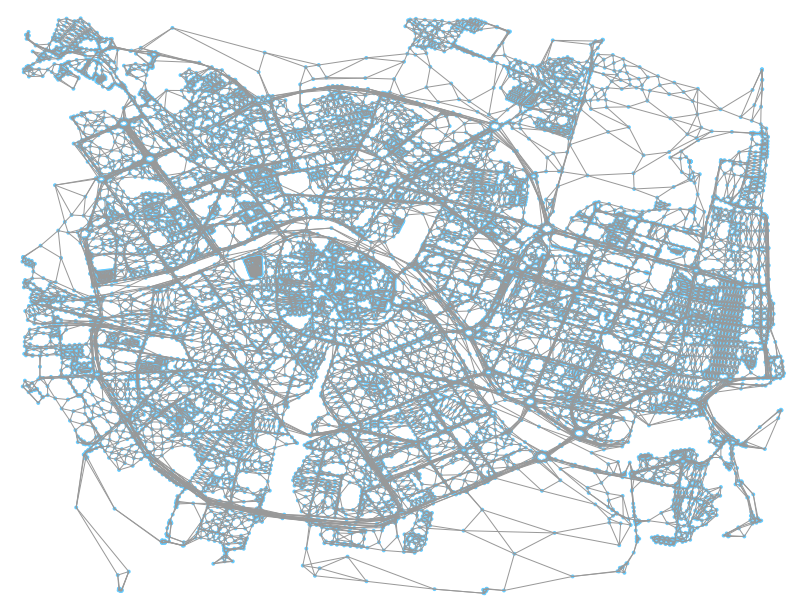

(<Figure size 1022.19x792 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1eb5faae5f8>)

In [145]:
ox.plot_graph(DG_elv_snf2, fig_height=11)

### 4.2.2 Route Dual graph 2 with snf2 

In [146]:
originND_snf2 = ox.get_nearest_node(DG_elv_snf2, originPt)
desND_snf2 = ox.get_nearest_node(DG_elv_snf2, desPt)
originND_snf2, desND_snf2

(17890, 11910)

In [148]:
routeD_snf2 = nx.shortest_path(DG_elv_snf2, originND_snf2, desND_snf2, weight='deg')
str(routeD_snf2)

NetworkXNoPath: No path to 11910.

In [149]:
#could i use route 2 (the nodes are exactly the same) and route on this graph that i can display?

In [159]:
str(routeND_snf)

'[17890, 8707, 4124, 4122, 4140, 4128, 4129, 4406, 4413, 25459, 25569, 25578, 25579, 14959, 14961, 10369, 2033, 14968, 1818, 20295, 20283, 13313, 16393, 18657, 9474, 9480, 24288, 8490, 25173, 25165, 25167, 90, 19614, 25113, 25108, 25103, 25100, 25133, 11259, 11897, 11898, 11910]'

AttributeError: 'NoneType' object has no attribute 'values'

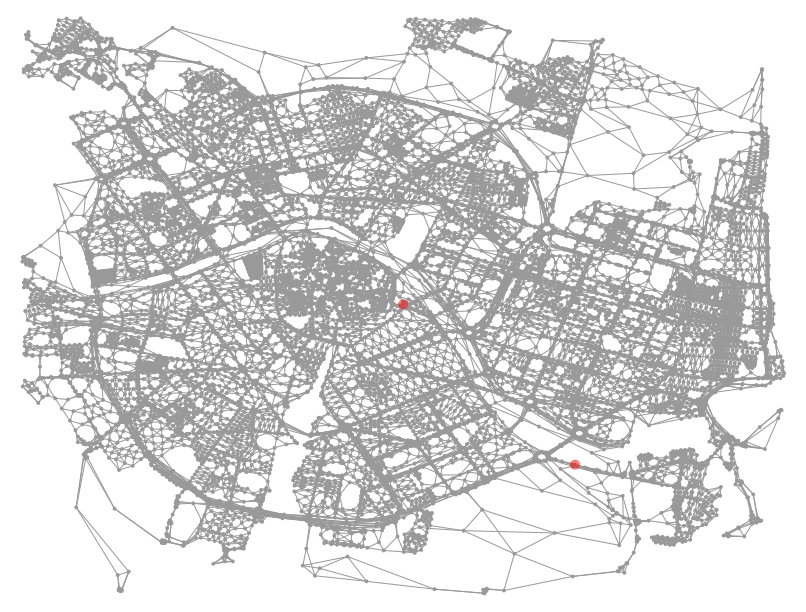

In [150]:
#snf2 graph, snf route
fig4, ax4 = ox.plot_graph_route(DG_elv_snf2, routeND_snf, fig_height = 11,orig_dest_point_color='b')

In [179]:
#try to just exact that line of code to understand - from what i see it is missing length
routelines2=ox.node_list_to_coordinate_lines(DG_elv_snf2, routeND_snf, use_geom=False)

AttributeError: 'NoneType' object has no attribute 'values'

In [27]:
#how to access data????
lala = DG_elv_snf2.get_edge_data(0,0)

In [29]:
lala

In [162]:
routeND_snf[:1]

[17890]

In [161]:
zip(routeND_snf[:1])

In [163]:
list(zip(routeND_snf[:1]))

[(17890,)]

In [180]:
#from nodes to uv of edge
edge_nodes = str(list(zip(routeND_snf[:-1],routeND_snf[1:])))
edge_nodes

'[(17890, 8707), (8707, 4124), (4124, 4122), (4122, 4140), (4140, 4128), (4128, 4129), (4129, 4406), (4406, 4413), (4413, 25459), (25459, 25569), (25569, 25578), (25578, 25579), (25579, 14959), (14959, 14961), (14961, 10369), (10369, 2033), (2033, 14968), (14968, 1818), (1818, 20295), (20295, 20283), (20283, 13313), (13313, 16393), (16393, 18657), (18657, 9474), (9474, 9480), (9480, 24288), (24288, 8490), (8490, 25173), (25173, 25165), (25165, 25167), (25167, 90), (90, 19614), (19614, 25113), (25113, 25108), (25108, 25103), (25103, 25100), (25100, 25133), (25133, 11259), (11259, 11897), (11897, 11898), (11898, 11910)]'

In [172]:
lines=[]

In [174]:
for u, v in edge_nodes:
    x1 = DG_elv_snf2.nodes[u]['x']
    y1 = DG_elv_snf2.nodes[u]['y']
    x2 = DG_elv_snf2.nodes[v]['x']
    y2 = DG_elv_snf2.nodes[v]['y']
    line = [(x1, y1), (x2, y2)]
    lines.append(line)

ValueError: not enough values to unpack (expected 2, got 1)

In [177]:
DG_elv_snf2.get_edge_data(17890, 8707).values()

AttributeError: 'NoneType' object has no attribute 'values'

In [34]:
test1 = DG_elv_snf2.get_edge_data(17890, 8707).value()
test1

AttributeError: 'NoneType' object has no attribute 'value'

In [181]:
dill.dump_session('valencia_G.db')

In [2]:
dill.load_session('valencia_G.db')

In [14]:
DG_elv_snf2.graph['name']

'Valencia'

In [16]:
dir(DG_elv_snf2)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adj',
 '_node',
 '_pred',
 '_succ',
 'add_cycle',
 'add_edge',
 'add_edges_from',
 'add_node',
 'add_nodes_from',
 'add_path',
 'add_star',
 'add_weighted_edges_from',
 'adj',
 'adjacency',
 'adjlist_inner_dict_factory',
 'adjlist_outer_dict_factory',
 'clear',
 'copy',
 'degree',
 'edge_attr_dict_factory',
 'edge_key_dict_factory',
 'edge_subgraph',
 'edges',
 'fresh_copy',
 'get_edge_data',
 'graph',
 'graph_attr_dict_factory',
 'has_edge',
 'has_node',
 'has_predecessor',
 'has_successor',
 'in_degree',
 'in_edges',
 'is_directed',
 'is_multigraph',
 'name',
 

In [35]:
test2= DG_elv_snf2.get_edge_data(17890, 8707).value()

AttributeError: 'NoneType' object has no attribute 'value'

In [38]:
G_EGrade3.

TypeError: cannot unpack non-iterable int object

In [39]:
originN, desN

(7960, 5101)

In [40]:
dill.dump_session('valencia_G.db')